<a href="https://colab.research.google.com/github/hortenciadiniz/ComponenteSinal/blob/main/ComponenteSinal_HD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install wavefile

In [3]:
import cmath
import numpy as np
import matplotlib.pyplot as plt
import wavefile
import sys

In [4]:
def fft_dit(x):
    N = len(x)

    # Verifica se N é igual a 1 (caso base da recursão)
    if N == 1:
        return x

    # Preenche x com zeros para tornar seu tamanho uma potência de 2
    next_pow_of_2 = int(2 ** np.ceil(np.log2(N)))
    x = np.pad(x, (0, next_pow_of_2 - N), 'constant')

    N = len(x)  # Atualiza o tamanho de N após o preenchimento

    # Inicializa as listas para as sequências pares e ímpares
    x_even = []
    x_odd = []

    for i in range(N):
        if i % 2 == 0:
            x_even.append(x[i])
        else:
            x_odd.append(x[i])

    # Recursivamente calcular a FFT das sequências pares e ímpares
    X_even = fft_dit(np.array(x_even))
    X_odd = fft_dit(np.array(x_odd))

    # Calcula os fatores de rotação W
    W = np.exp(-2j * np.pi / N * np.arange(N // 2))

    # Inicializa o vetor de saída X
    X = np.zeros(N, dtype=np.complex128)

    for i in range(N // 2):
        X[i] = X_even[i] + W[i] * X_odd[i]
        X[i + N // 2] = X_even[i] - W[i] * X_odd[i]

    return X

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# returns the contents of the wav file as a double precision float array
def wav_to_floats(filename = 'sinal.wav'):
    w = wavefile.load(filename)
    return w[1][0]

In [6]:
audio = wav_to_floats('/content/drive/MyDrive/PDS/sinal.wav')
print ("read "+str(len(audio))+" frames")
print  ("in the range "+str(min(audio))+" to "+str(max(audio)))

read 319336 frames
in the range -0.453125 to 0.671875


In [8]:
# Array de tempo do arquivo de audio
tempo_audio = np.arange(0, audio.size, 1.0)

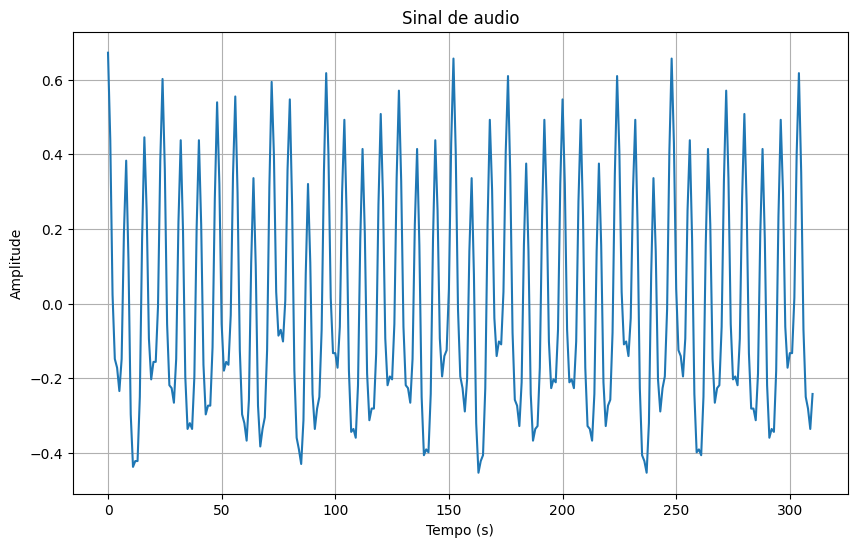

In [21]:
# Plotagem do sinal de audio
plt.figure(figsize=(10, 6))
plt.plot(tempo_audio[: int(audio.size/1024)], audio[: int(audio.size/1024)])
plt.title('Sinal de audio')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [16]:
# Calcula a FFT do sinal composto
X = fft_dit(audio)

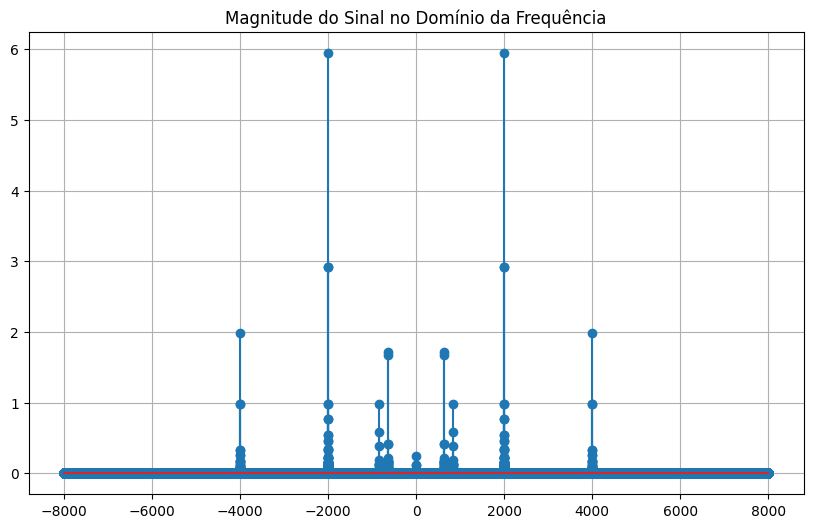

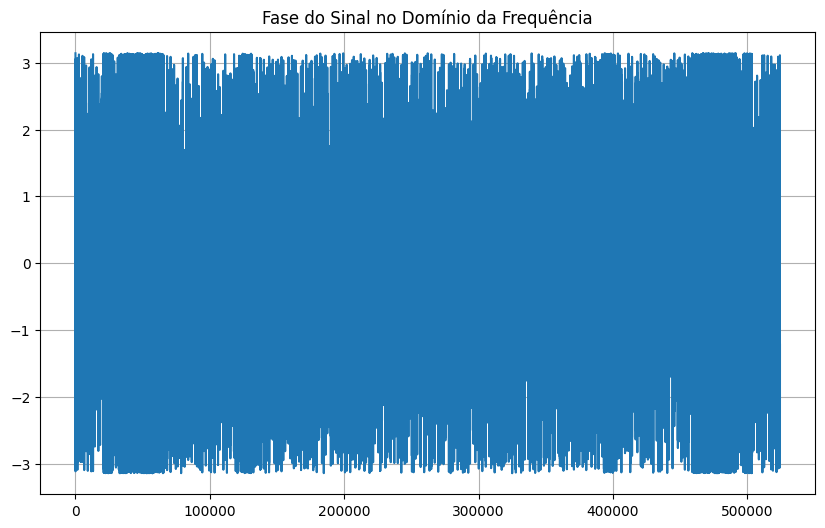

In [24]:
taxa_amostragem_audio = 16e3

# Cria os vetores de frequência para os gráficos
freq_X = np.fft.fftfreq(len(X), 1/taxa_amostragem_audio)

# Plota a magnitude do sinal no domínio da frequência
escala = 1/10000;
plt.figure(figsize=(10, 6))
plt.title('Magnitude do Sinal no Domínio da Frequência')
plt.stem(freq_X, escala*np.abs(X))
plt.grid(True)

# Plota a fase do sinal no domínio da frequência
plt.figure(figsize=(10, 6))
plt.title('Fase do Sinal no Domínio da Frequência')
plt.plot(np.angle(X))
plt.grid(True)

plt.show()